## 2.3.5 결정 트리

결정 트리(dicision tree)는 분류와 회귀 모델에 널리 사용하는 모델입니다. 
기본적으로 결정 트리는 결정에 다다르기 위해 예/아니요 질문을 이어 나가면서 학습합니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from matplotlib import rc
rc('font', family='AppleGothic') 			## 애플 폰트 추가로
plt.rcParams['axes.unicode_minus'] = False  ## 한글 깨짐 방지

<img src="img/decisoin_tree.png">

이런 모델을 직접 만드는 대신 지도 학습 방법으로 데이터로부터 학습할 수 있습니다.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도:  {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도:  1.000
테스트 세트 정확도: 0.937


결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해질 수 있습니다.
그래서 가지치기하지 않은 트리는 과대적합되기 쉽고 새로운 데이터에 잘 일반화되지 않습니다.

이제 사전 가지치기를 트리에 적용해서 훈련 데이터에 완전히 학습되기 전에 트리의 성장을 막아보겠습니다. 

max_depth=4 옵션을 주면 연속된 질문을 최대 4개로 제한합니다.

In [3]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


### 결정 트리 분석

트리 모듈의 export_graphviz 함수를 이용해서 시각화할 수 있습니다.

각 도느에서 다수인 클래스를 색으로 나타내기 위해 옵션을 주고 적절히 래이블 되도록 클래스 이름과 특성 이름을 매개변수로 전달합니다.

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

오류 메시지

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH
 

해결 방법

os 별로 공식 홈페이지에서 권장하는 방법으로 graphviz를 설치한다. 나의 경우 OSX에 설치하므로 homebrew 를 활용하여 설치함

$ brew install graphviz

다시 pip3 install graphviz로 설치해주면 끝

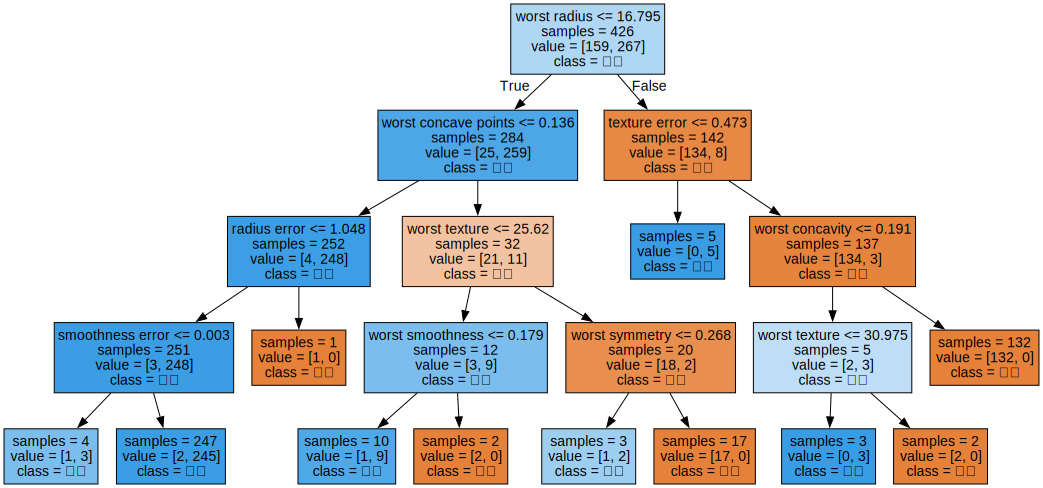

In [6]:
import graphviz

with open("tree.dot") as  f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

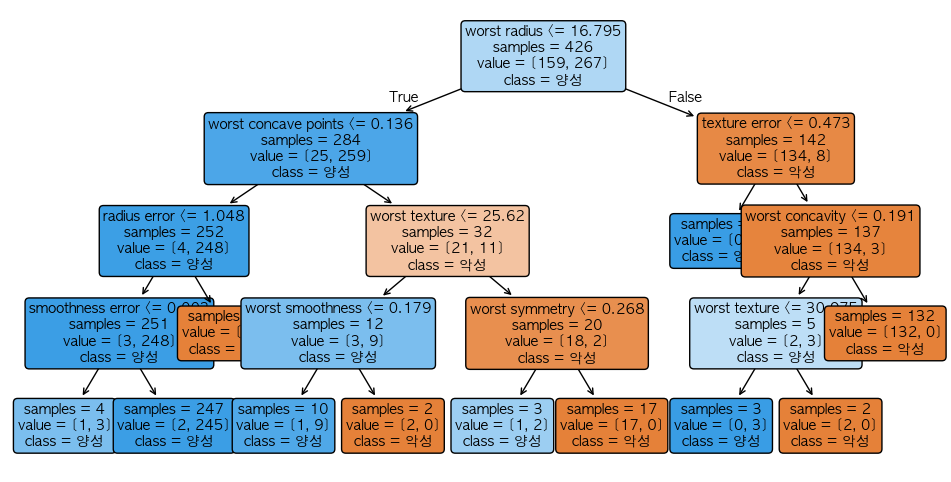

In [9]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 6))
plot_tree(tree, class_names=["악성", "양성"],
          feature_names=cancer.feature_names.tolist(),
          impurity=False, filled=True, rounded=True, fontsize=10)
plt.show()

In [10]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


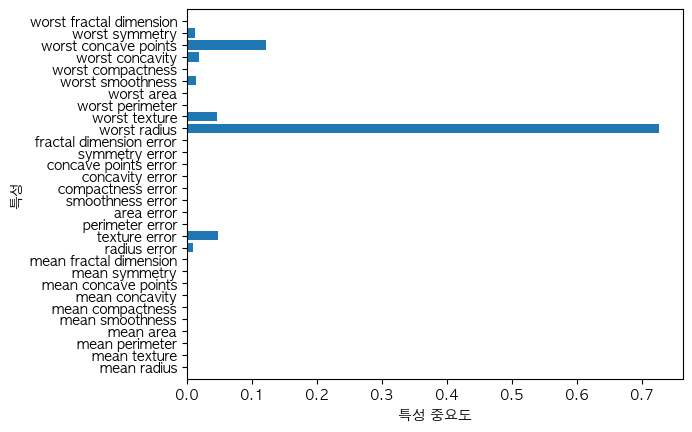

In [12]:
def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importance_cancer(tree)

Feature importances: [0. 1.]


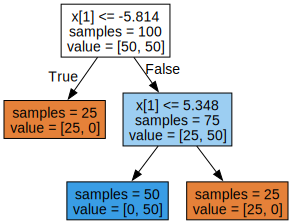

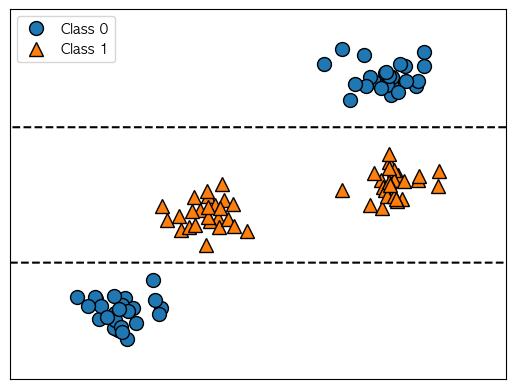

In [13]:
mglearn.plots.plot_tree_not_monotone()

Text(0, 0.5, '가격 ($/mByte)')

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


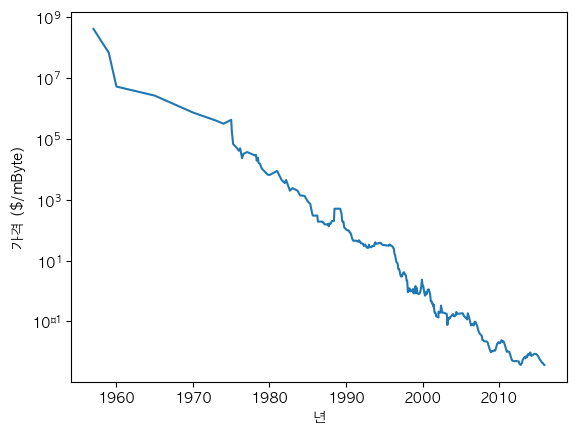

In [17]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "AppleGothic")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/mByte)")

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다.
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타킷 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다.
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다.
X_all  = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


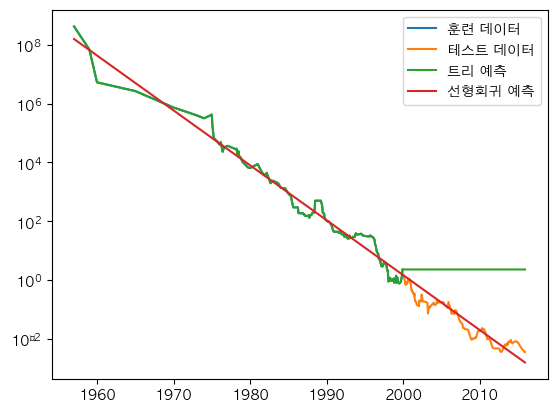

In [20]:
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()